<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h3 style="text-align: center;"><b>Семинар. Введение в обучение моделей при помощи библиотеки sklearn </b></h3>

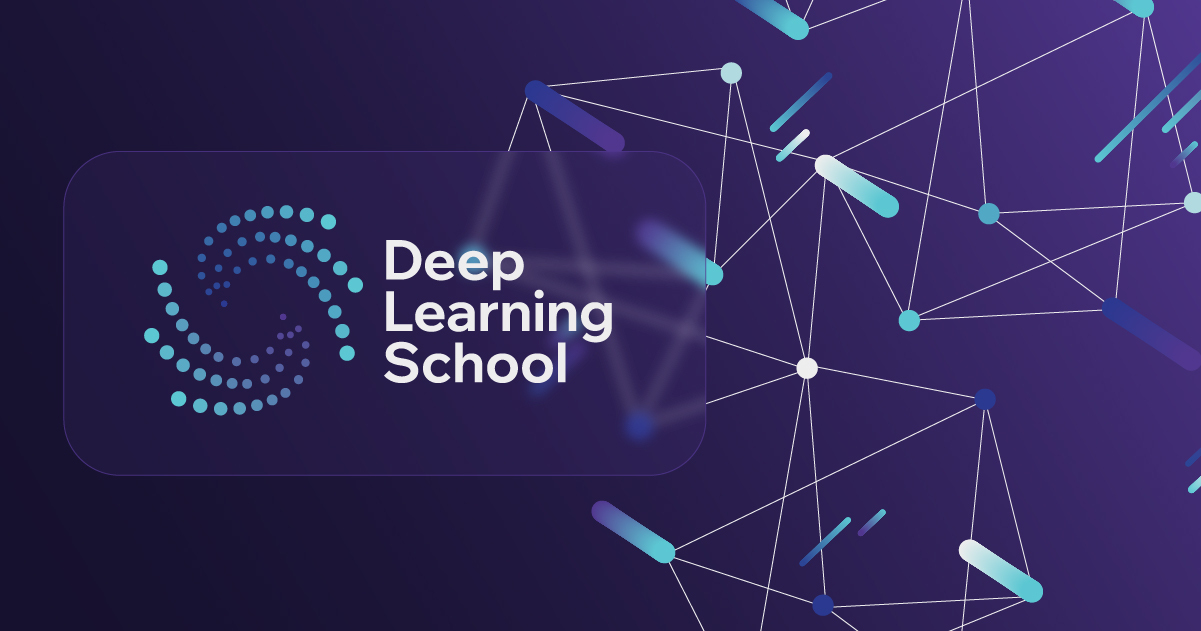

В этом семинаре мы научимся строить и обучать модели при помощи библиотеки sklearn.

План урока:

1. Введение в задачу
  * Загрузка датасета
    * Подготовка датасет
    * Описание задачи
      * Задача регрессии
      * Задача классификации
2. Знакомство с kNN алгоритмом и библиотекой sklearn
  * Имплементация алгоритма k-ближайших соседей
  * Алгоритм k-ближайших соседей при помощи sklearn
  * Алгоритм Decision Tree
3. Описание метрик
    * для классификации
    * для регрессии
4. Переобучение и методы борьбы с ней
  * Кросс-валидация
  * GridSearchCV
6. Про сохранение моделей в sklearn


## 1. Введение в задачу

### 1.0. Библиотеки

In [ ]:
!pip uninstall -y scikit-learn # удалим более старую версию библиотеки
!pip install scikit-learn # установим версию поновее

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 19.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

### 1.1. Датасет

#### Описание датасета

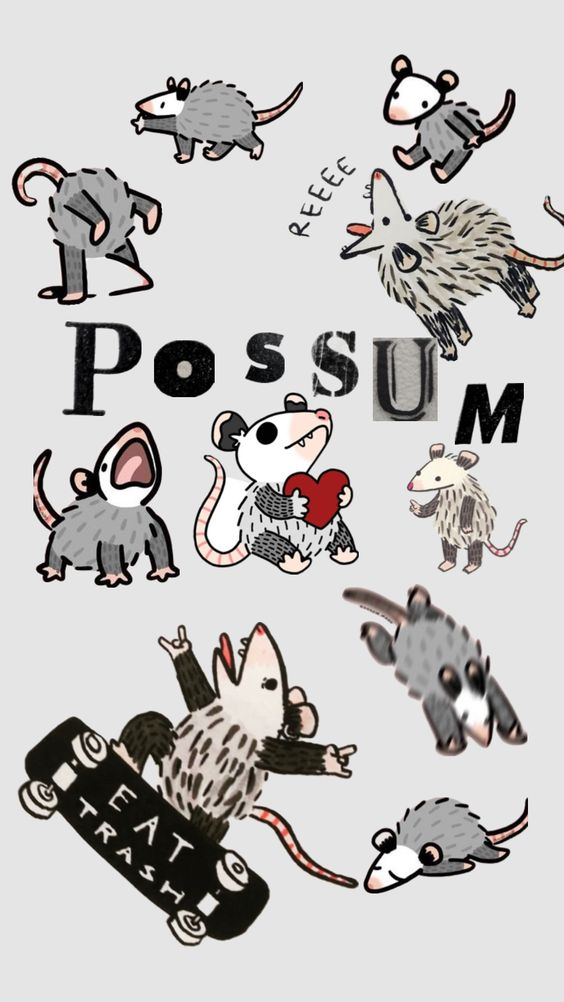

В этом семинаре мы будем работать с данными с kaggle соревнования [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum).

В этой задаче нужно предсказать возраст оппосума по имеющимся о нем данным:
- **Таргет**: **age** - Возраст
- **case** - Номер наблюдения
- **site** - Номер участка, на котором был отловлен опоссум
- **Pop** - Поселение, либо Vic (Виктория), либо другое (Новый Южный Уэльс или Квинсленд)
- **sex** - Пол
- **hdlngth** - Длина головы, в мм.
- **skullw** - Ширина черепа, в мм.
- **totlngth** 	- Общая длина, в см.
- **taill** 	- Длина хвоста, в см.
- **footlgth** 	- Длина стопы
- **earconch** 	- Длина ушной раковины
- **eye** 	- Расстояние от медиального канта до латерального канта правого глаза
- **chest** 	- Обхват груди (в см)
- **belly** - Обхват живота (в см)

#### Описание задачи

В этом семинаре мы будем решать задачу регрессии. В домашнем задании вам предстоит решить задачу классификации. Давайте разберемся чем принципиально отличаются эти задачи.

**Задача регрессии** — это задача прогнозирования количественных переменных, т.е. величин $y$, которые принадлежат множеству действительных чисел $y \in \mathbb{R}$. Другими словами, нам нужно предсказать какую то непрерывную величину (т.е. какое угодно значение в диапазоне). Пример задачи регрессии — предсказание стоимости дома на основе его площади, количества комнат и расположения. Цена дома может варьироваться от $0$ до $+ \infty$ и быть какой угодно.

**Задача классификации** — это задача предсказания категориальных переменных (классов) на основе признаков элементов. Пример задачи классификации — определение вида растения на основе его размеров и формы листьев. Здесь количество видов растений конечно.

Давайте приведем примеры задачи регрессии и задачи классификации на основе датасета про оппосумов, который мы будем использовать на этом семинаре.


*Пример задачи классификации:* — предсказать живой оппосум или нет. В данной задаче у нас есть два четких класса: 0 - притворился, что мертв (живой) и 1 - мертв. Значения детерминированы (четко определены). Между классом 0 и 1 нет других значений. Нет такого, что опоссум может быть мертвым наполовину или на четвертинку: он либо мертв, либо нет.

<image src="https://drive.google.com/uc?id=13x7M9SEcm-bv3l0UfjEgLtHK4vLuDi9b">

Пример задачи регрессии — задача предсказания возраста оппосума по имеющимся о нем данным. Это задача регрессии, так как тут мы предсказываем непрерывное значение (т.е. предсказанием может быть любая цифра, не только целая, но и дробная, например 1.5 года) в диапазоне от 1 до 8 (в среднем оппосумы живут от 5 до 8 лет).







#### Загрузка датасета

In [ ]:
!gdown 1Q-ev_KbSlyw2kfLL6I9Mu8I4Sgb4RGM7

In [ ]:
df = pd.read_csv("possum.csv")
df.head()

#### Подготовка датасета

Номер наблюдения, номер участка, и место поселения никакого влияния, пол на возраст оппосумов не дает. Поэтому давайте удалим неинформативные для нас признаки.

In [ ]:
# удаляем неинформативные признаки
df.drop(columns=['case', 'site', 'Pop', 'sex'], inplace=True)

Посмотрим, в каких колонках есть пропуски:

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)

X = df.drop(['age'], axis=1)
y = df['age']

И разделим нашу выборку на тренировочную и тестовую:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## 2. Модель

### k-Nearest Neighbors алгоритм

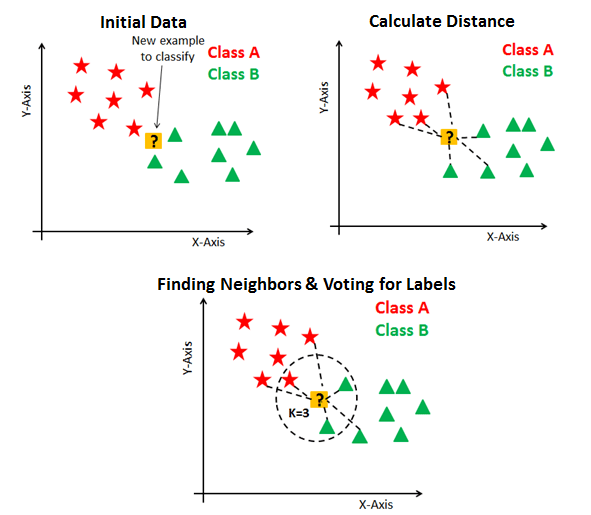

Картинка взята [отсюда](https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6).

Алгоритм k-Nearest Neighbors (метод ближайших соседей) или сокращенно KNN - это очень простой метод. Работает он так: пусть у нас есть набор обучающих данных и нам нужно сделать предсказание для тестового элемента. Давайте среди обучающих данных найдем k ближайших элементов к нашему тестовому элементу. Далее:
-  если у нас задача классификации, то посмотрим, какой из классов чаще всего встречается среди найденных ближайшиъ элементов. Этот класс и будет ответом для нашего тестового элемента.
- если у нас задача регрессии, то выдадим ответ на тестовый элемент как среднее арифметическое ответов для найденных ближайших элементов.  

При этом близость элементов может быть измерена различными способами. Стандартный выбор — евклидово расстояние медлу векторами признаков элементов. Чем оно меньше, тем элементы ближе друг к другу. Но можно использовать совершенно разные метрики расстояния, подбирая их в зависимости от типа данных и задачи.

Заметим, что в KNN процесс обучения модели как таковой отсутствует, так как никакая работа не выполняется до тех пор, пока не потребуется выдать предсказание на новый элемент. Поэтому KNN часто называют методом ленивого обучения.

Подытожив, алгоритм KNN можно описать тремя шагами:

- Шаг 1: Посчитать расстояние.
- Шаг 2: Найти ближайших соседей.
- Шаг 3: Сделать предсказание.


#### **Шаг 1.** Функция подсчета расстояния между элементами

Давайте возьмем эвклидово расстояние как то, на котором будет работать наш KNN алгоритм. Эвклидово расстояние между двумя точками считается по следующей формуле:

$$Eucledian \space distance(x_1, x_2) = \sqrt{\frac{1}{N}\sum_{i=1}^{n} (x_1^i - x_2^i)^2}$$

In [ ]:
a = [2., 2.]
b = [4., 4.]

без Numpy:

In [ ]:
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance_dummy(vec1, vec2):
	distance = 0.0
	for i in range(len(vec1)):
		distance += (vec1[i] - vec2[i])**2
	return sqrt(distance)

In [ ]:
euclidean_distance_dummy(a, b)

с Numpy:

In [ ]:
import numpy as np
def euclidean_distance_numpy(vec1, vec2):
	return np.linalg.norm(vec1 - vec2)

In [ ]:
euclidean_distance_numpy(np.array(a), np.array(b))

In [ ]:
assert euclidean_distance_dummy(a, b) == euclidean_distance_numpy(np.array(a), np.array(b))

#### **Шаг 2.** Нахождение ближайших соседей

Напишем функцию, которая по тренировочной выборке, тестовому примеру и количеству соседей $k$ находит $k$ ближайших элементов к тестовому элементу.

без Numpy:

In [ ]:
X_test[0]

In [ ]:
X_train[:5]

In [ ]:
# Locate the most similar neighbors
def get_neighbors_dummy(train, test_row, num_neighbors):
	distances = list()
	for train_id, train_row in enumerate(train):
		dist = euclidean_distance_dummy(test_row, train_row)
		distances.append((train_id, dist))

	distances.sort(key=lambda tup: tup[1])

	nearest_neighbor_ids = list()
	for i in range(num_neighbors):
		nearest_neighbor_ids.append(distances[i][0])
	return nearest_neighbor_ids

Просто переписала функцию покороче:

In [ ]:
# Locate the most similar neighbors
def get_neighbors_dummy(train, test_row, num_neighbors):
        distances = list()
        for train_id, train_row in enumerate(train):
                dist = euclidean_distance_dummy(test_row, train_row)
                distances.append((train_id, dist))

        distances.sort(key=lambda tup: tup[1])

        nearest_neighbor_ids = [i[0] for i in distances[:num_neighbors]]
        return nearest_neighbor_ids

In [ ]:
get_neighbors_dummy(X_train[:5], X_test[1], 3)

с Numpy:

In [ ]:
def get_neighbors_numpy(train, test_row, num_neighbors):
  # наша дистанция это расстояние между каждым элементом train и test_row, поэтому пишем train - test_row
  distances = np.linalg.norm(train - test_row, axis=1)
  nearest_neighbor_ids = distances.argsort()[:num_neighbors]
  return nearest_neighbor_ids

In [ ]:
get_neighbors_numpy(X_train[:5], X_test[1], 3)

In [ ]:
assert euclidean_distance_dummy(a, b) == euclidean_distance_numpy(np.array(a), np.array(b))

#### **Шаг 3.** Получение предсказания для тестовых элементов

Реализуем функцию получения предсказания для тестового набора данных.

Без Numpy:

In [ ]:
def predict_dummy(X_train, X_test, y_train, num_neighbors = 3):

    y_predict = [] # общая переменная предсказаний, для каждого эл-та из X_test
    for x_test in X_test:
      neighbors_ids = get_neighbors_dummy(X_train, x_test, num_neighbors)
      nearest_neighbor_y = [y_train[id] for id in neighbors_ids] # берем результаты по индексам среди neighbors_ids

      pred = np.mean(nearest_neighbor_y)
      y_predict.append(pred)

    return y_predict

In [ ]:
y_predict = predict_dummy(X_train[:30], X_test[:5], y_train[:30], num_neighbors = 5)
y_predict

с Numpy:

In [ ]:
def predict_numpy(X_train, X_test, y_train, num_neighbors):

  y_predict = []
  for x_test in X_test:
    nearest_neighbor_ids = get_neighbors_numpy(X_train, x_test, num_neighbors)
    nearest_neighbor_y = y_train[nearest_neighbor_ids]
    pred = np.mean(nearest_neighbor_y)
    y_predict.append(pred)

  return y_predict

In [ ]:
y_predict = predict_numpy(X_train[:30], X_test[:5], y_train[:30], num_neighbors = 5)
y_predict

In [ ]:
assert predict_dummy(X_train[:30], X_test[:5], y_train[:30], num_neighbors = 5) == predict_numpy(X_train[:30], X_test[:5], y_train[:30], num_neighbors = 5)

### kNN при помощи Sklearn

#### Введение в Sklearn

 [Scikit-learn (Sklearn)](https://www.google.com/search?client=safari&rls=en&q=sklearn&ie=UTF-8&oe=UTF-8) — это одна из самых популярных библиотек для машинного обучения на языке Python. Она предоставляет простой и эффективный инструментарий для анализа данных и моделирования. С помощью scikit-learn можно решать большинство стандартных задач машинного обучения, такие как классификация, регрессия, кластеризация, понижение размерности данных.  

Мы ранее прописали весь алгоритм knn в несколько функций. Библиотека sklearn для нашего удобства обернула всю логику алгоритма в питоновский класс `KNeighborsRegressor` (для задачи регрессии) или `KNeighborsClassifier` (для задачи классификации) с методами `.fit()` и `.predict()`.

Метод `.fit()` служит для обучения модели на основе данных. В случае KNN этот метод сохраняет элементы обучающих данных для последующего использования для предсказания ответов на новые элементы.

Метод `.predict()` делает предсказания на тестовых данных. Т.е. этот метод делает шаги 2 и 3 алгоритма: для каждого тестового элемента находит $k$ ближайших к нему соседей и выдает среднее значение целевой переменной этих $k$ соседей в качестве ответа.

Таким образом, мы можем обучить модель и предсказывать всего парой строк кода!

In [ ]:
# Шаг 1. создание модели
model = KNeighborsRegressor(n_neighbors=5)

# Шаг 2. обучение модели
model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [ ]:
y_pred

### Decision Tree

Давайте рассмотрим другую модель машинного обучения — `DecisionTree()`.

Узнать подробнее о том, что под капотом у класса `DecisionTree()`, можно в лекции $→$ [тык](https://www.youtube.com/live/h5vF3mUxNUw).

Пока скажем, что это модель, которая строит предсказание задавая себе много вопросов формата "да-нет":

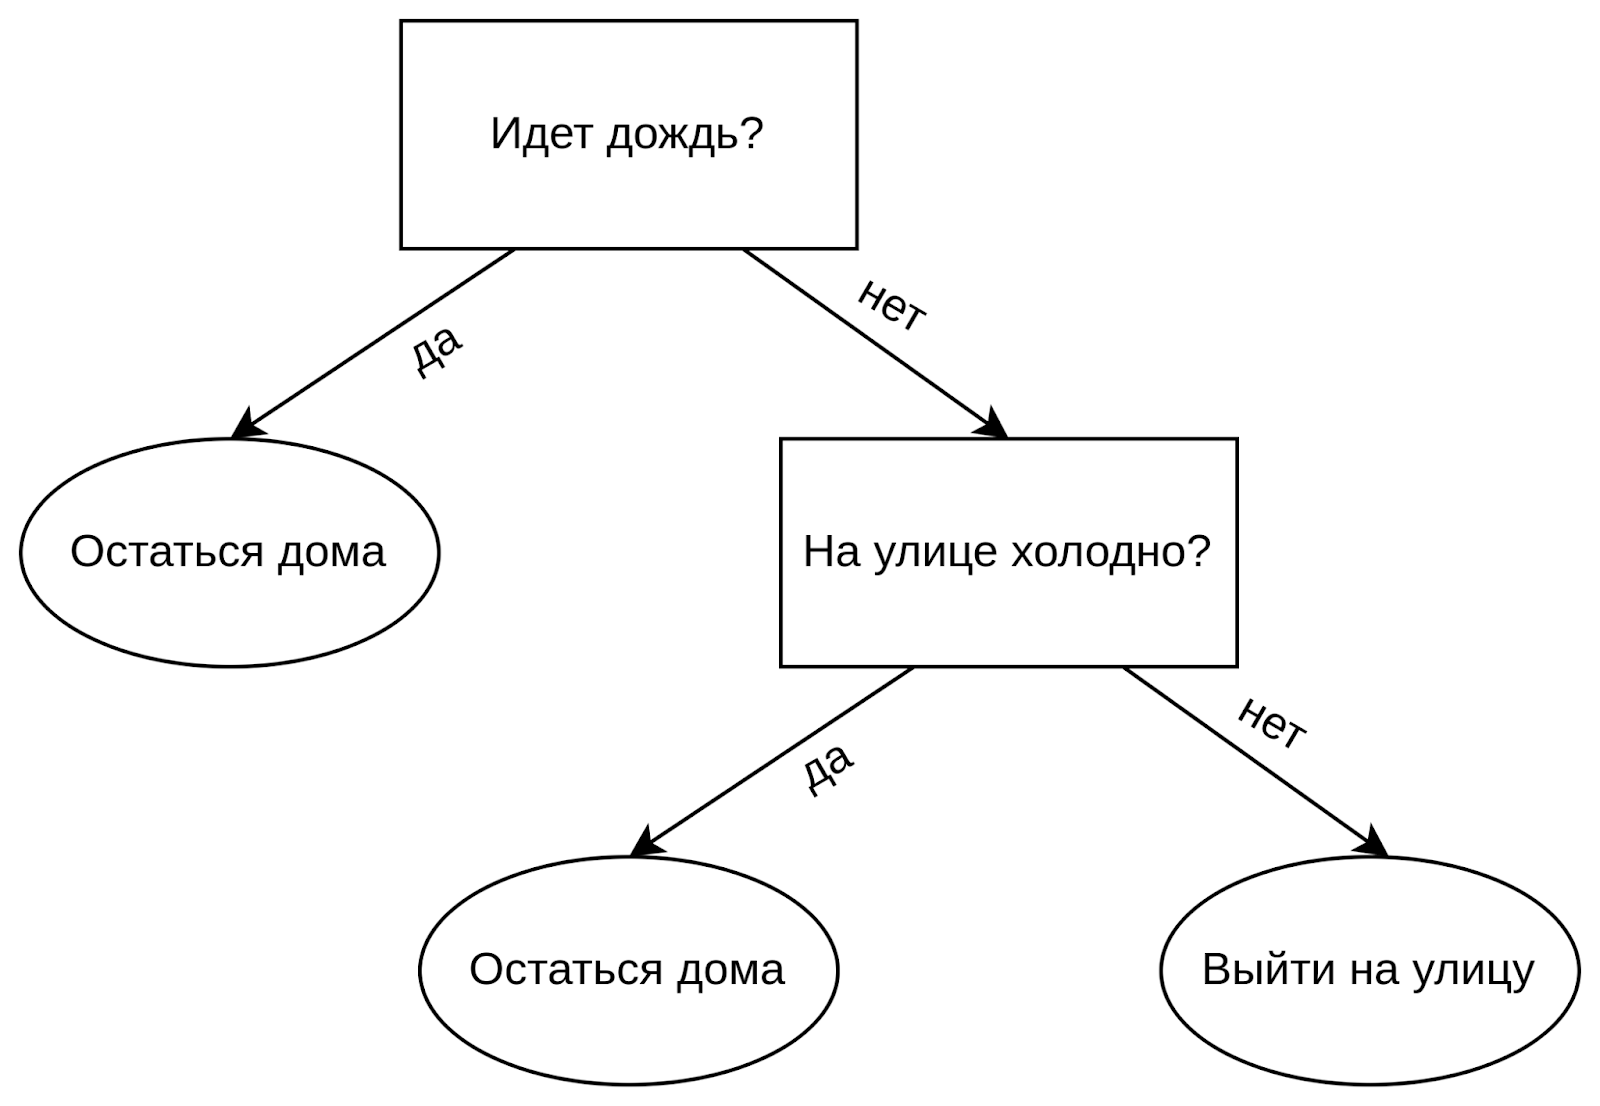

Дерево решений в машинном обучении выглядит вот так:

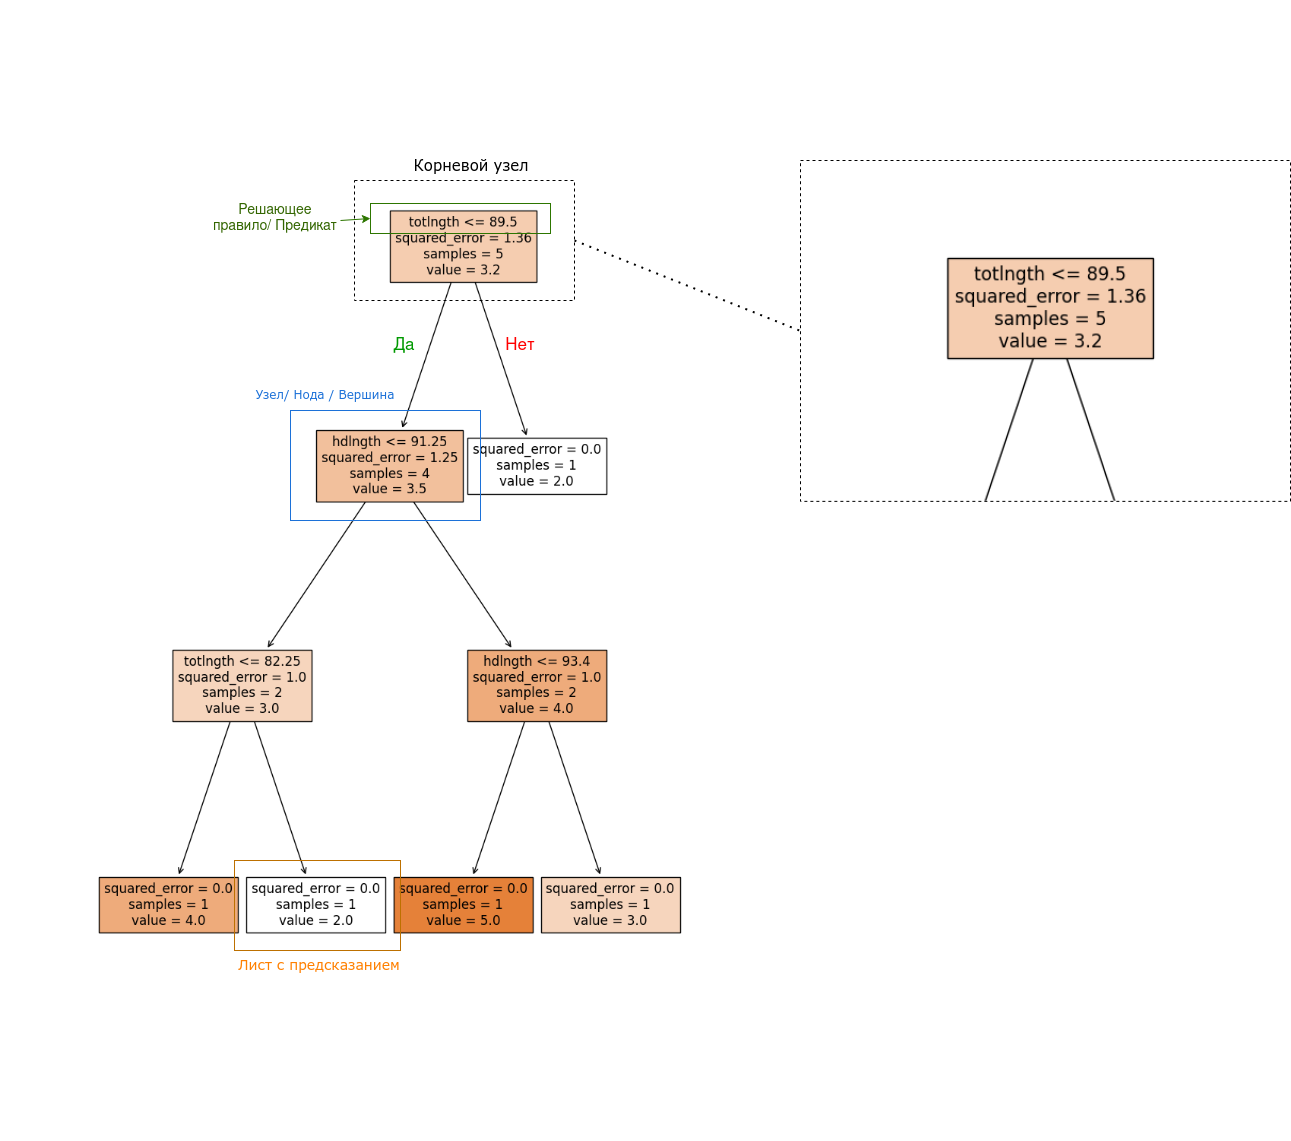

In [ ]:
# Обучим модель
from sklearn.tree import DecisionTreeRegressor

# random_state отвечате за инициализацию последовательности случайных чисел, будет одна и та же инициализация
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)

## 3. Метрики

Итак, мы научились объявлять модель, обучать ее и получать предсказания на тестовые элементы. Давайте теперь подумаем, как оценивать то, насколько хороша наша модель. Роль оценки моделей на себя берут метрики. Это функции, которые принимают на вход правильные ответы на тестовые данные и ответы модели, и выдают число — меру "хорошести" предсказаний модели. Для каждой задачи сущесвуют свои метрики. В данном семинаре мы рассмотрим лишь несколько метрик для задачи регрессии. Более подробный обзор метрик для задач регрессии и классификации можно найти в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для нашей задачи мы будем использовать метрику MSE

**MSE** (Mean Squared Error, или, по русски, среднеквадратичная ошибка) — одна из самых популярных метрик в задаче регрессии. MSE считается по следующей формуле:

$$MSE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2$$

Иногда для того, чтобы значение метрики MSE имело масштаб значений целевой переменной, из него извлекают квадратный корень. Это называют метрикой RMSE (Root Mean Squared Error):

$$RMSE(y_{true}, y_{pred}) = \sqrt{\frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}$$

MSE не ограничен сверху. По значению MSE может быть нелегко понять, насколько оно «хороше» или «плохое». Для ориентира часто берут наилучшее константное предсказание с точки зрения MSE — среднее арифметическое значений целевой переменной обучающей части данных. Далее можно посчитать метрику $R^2$:

$$R^2(y_{true}, y_{pred}) = 1 - \frac{\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}{\sum_{i=1}^{n} (y^{true}_i - y^{true}_{mean})^2}$$

Верхняя граница $R^2$ — 1. Чем значение $R^2$ ближе к 1, тем лучше обучилась модель.

(!) В числителе сумма квадратов ошибок нашей модели (это MSE*n), а знаменатель это квадрат отклонения от среднего. То есть смотрим лучше ли наша модель обычного усреднения
В числителе дисперсия ошибки модели, в знаменателе дисперсия случайной величины

Так как в MSE ошибка на каждом элементе возводится в квадрат, MSE сильно штрафует за большие ошибки на элементах. И если в наших тестовых данных присутствуют выбросы, то ошибки на этих выбросах будут вносить существенный вклад в MSE, и, чтобы уменьшить метрику, модель будет стараться уменьшать ошибки именно на этих на объектах-выбросах, а не на остальных элементах. Поэтому MSE может быть не лучшей метрикой для сравнения моделей на выборках с большим количеством выбросов. В таких случаях прибегают к метрике MAE (Mean Absolute Error):

$$MAE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} |y^{true}_i - y^{pred}_i|$$

Существуют и другие метрики для задачи регрессии. Каждая метрика используется под определенные случаи. Какие метрики есть в sklearn, можно посмотреть [здесь](https://scikit-learn.org/stable/modules/model_evaluation.html).

В наших данных нет сильных выбросов, поэтому вполне можно использовать MSE в качестве метрики. Но для наглядности мы рассмотрим все упомянутые выше метрики.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = model.predict(X_train) # предсказание на
pred_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на тренировочной выборке равна 0, а $R^2 = 1$. Это говорит нам о том, что во все истинные значения наша модель идеально попала. Ситуация, когда на тренировочных данных модель предсказывает идеально, а на тестовой выборке очень плохо, называется **переобучением**. Модель запоминает огромное количество всех возможных примеров вместо того, чтобы научиться подмечать особенности.

Деревья решений часто страдают от переобучения. Они за счет большого количества вопросов могут подстраиваться под довольно сложные закономерности, и иногда настолько хорошо, что попросту запоминают всё, что видели в обучающем наборе данных.

## 4. Переобучение и методы борьбы с ним

### 4.1. Кросс-валидация

Один из способов борьбы с переобучением — это увеличивание данных на обучении. Но что делать, если данных мало?

Кросс-валидация — это процедура, при которой мы разделяем весь датасет на несколько частей, и одну из частей используем для теста, а остальные для обучения. Здесь мы разберем метод **k-Fold**.

Для понятности, давайте посмотрим на рисунок:

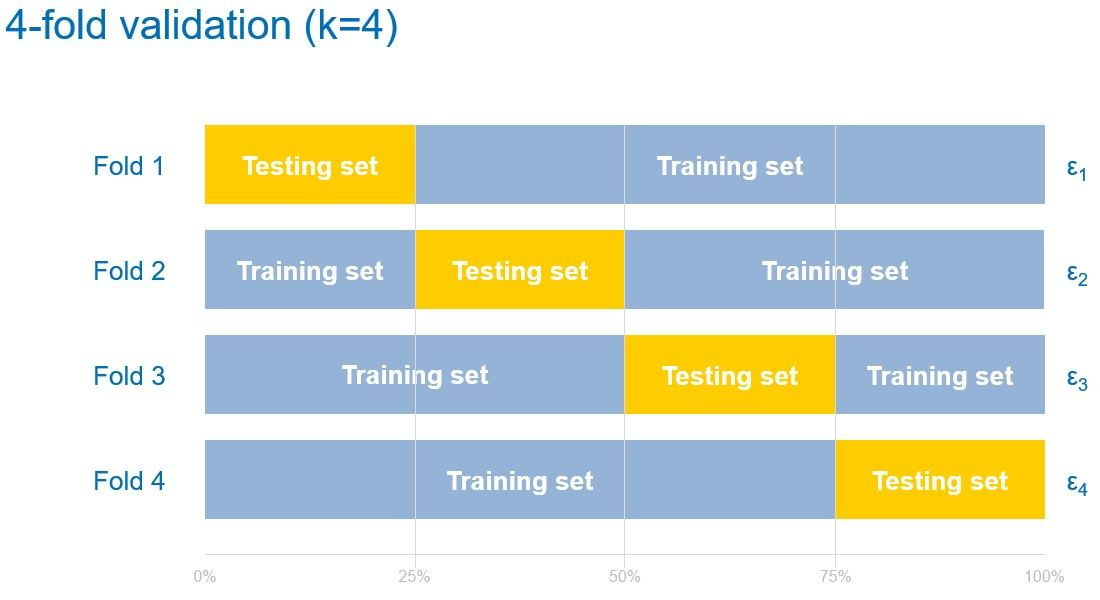

На рисунке мы разделили датасет на 4 равные части. Для первого случая (Fold 1) мы использовали для обучения 2,3,4 части, а в качестве тестовой выборки мы использовали 1-ую часть и посчитали метрики на ней. Для второго случая (Fold 2) мы обучались на частях 1,3,4 и посчитали метрики на 2-ой части. И так далее. И после мы усреднили метрики, полученные на каждой части.

Псевдо-алгоритм, получается, такой:
1. Выбираем $k$ - количество частей, на которые разобьется наш обучающий датасет;
2. for $ i = 1..k$
    * Обучим модель на всех частях датасета, кроме i-ой.
    * Посчитаем метрики или предсказания для i-ой части
3. Саггрегируем все предсказания (например, усредним метрики)

Таким образом мы сможем получить более объективные оценки предсказательной способности нашей модели, использовав весь датасет как train и как test, при этом не создав утечек данных.

Более подробный разбор различных методов кросс-валидации можно почитать в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/kross-validaciya).

В библиотеке sklearn уже реализовали алгоритм k-fold кросс-валидацию.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

# принимает на вход модель, данные, cv это разбиение, потом передаем метрики
scores = cross_validate(DecisionTreeRegressor(random_state=44), X, y, cv=5,
                        scoring={'r2': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)},
                        return_train_score=True) # возвращаем метрики по train выборке

print('R2 train mean = ', scores['train_r2'].mean())
print('R2 test mean = ', scores['test_r2'].mean())

print('MSE train mean = ', scores['train_mean_squared_error'].mean())
print('MSE test mean = ', scores['test_mean_squared_error'].mean())

Итак, конкретно нам в данном случае увеличение датасета не помогло избавиться от переобучения. Следующее что мы можем сделать — это подобрать различные гиперпараметры модели.

### 4.2. Подбор гиперпараметров и GridSearchCV

In [ ]:
?DecisionTreeRegressor

Основные параметры деревьев решений, которые помогают бороться с переобучением:
- `max_depth` - глубина дерева
- `min_samples_leaf` - минимальное количество объектов в одном листе.
- `max_leaf_nodes` -  максимальное количество листьев.

Все три параметра связаны между собой: чем меньше уровней с вопросами (`max_depth`), тем меньше вопросов и меньше листьев (`max_leaf_nodes`), тем больше количество объектов в одном листе (`min_samples_leaf`).

Давайте попробуем поварьировать каждый из них.

In [ ]:
# Какие дефолтные параметры стоят
model.get_params()

In [ ]:
# Дефолтные параметры
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

In [ ]:
# Поменяем глубину дерева
model = DecisionTreeRegressor(random_state=1,
                              max_depth=4,
                              min_samples_leaf=1,
                              max_leaf_nodes=None)

model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

In [ ]:
# Поменяем максимальное количество листьев

model = DecisionTreeRegressor(random_state=1,
                              max_depth=4,
                              min_samples_leaf=2,
                              max_leaf_nodes=None)

model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

In [ ]:
# Поменяем максимальное количество образцов

model = DecisionTreeRegressor(random_state=1,
                              max_depth=4,
                              min_samples_leaf=1,
                              max_leaf_nodes=3)

model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

Перед тем, как мы стали подбирать параметры, MSE на тестовой выборке была 4.04. Теперь мы видим, что ошибка уменьшилась в 4 раза и MSE = 1.31.

Таким образом, перебирая значения гиперпараметров, можно уменьшить переобучение и достичь лучшего значения метрик на тестовых данных. Тем не менее, вручную перебирать параметры неудобно. Для таких случаев в sklearn был реализован класс `GridSearchCV()`, который автоматически перебирает все возможные значения гиперпараметров по сетке.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# заново создадим модель
model = DecisionTreeRegressor()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'min_samples_leaf': [1, 2, 3],
}

# создадим объект GridSearchCV
# refit значит, что обучаем модель заново с лучшими параметрами
gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(r2_score))

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, best_model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, best_model.predict(X_test))}')

Итак, при помощи GridSearchCV мы нашли наилучшую модель, коорая дала нам MSE = 1.37.

#### Отступление

Вопрос в комментариях на stepik и мои попытки разобраться в теме:

Кто-нибудь может пояснить почему мы подбираем гиперпараметры через сетку (GridSearchCV) для тренировочный выборки (аргументы X_train и y_train - смотреть первый скришот)? Как я понял в таком случае у нас для каждого набора гиперпараметров будет происходит обучение модели и достигаться минимальная функция ошибки но ТОЛЬКО ДЛЯ y_train. И тогда метод в качестве лучшего набора гиперпараметров должен выдать те с которыми произойдёт переобучение (для одного из заданных в сетке наборов гиперпараметров)

Для проверки этого я попробовал запустить подбор гиперпараметров, но только в качестве возможной максимальной глубины добавил значение None (первый скриншот). В теории, метод должен был выдать дефолтный набор гиперпараметров поскольку именно с ним достигался 0 функции ошибок (что и показано на втором скриншоте). Однако почему-то лучшим набором всё равно считается вариант с глубиной 1 (max_depth = 1).

В итоге возникает два вопроса:

1) Можете, пожалуйста, пояснить почему лучшим вариантом метод с сеткой (gridsearch.fit(X_train, y_train)) посчитал вариант с глубиной 1, хотя при обучении модели с глубиной None и всех прочих равных параметрах ошибка будет меньше (второй скриншот)
2) И почему мы производим побор гиперпараметров по тренировочной выборке, если как раз на ней и происходит переобучение, которое мы можем обнаружить только на тестовой выборке


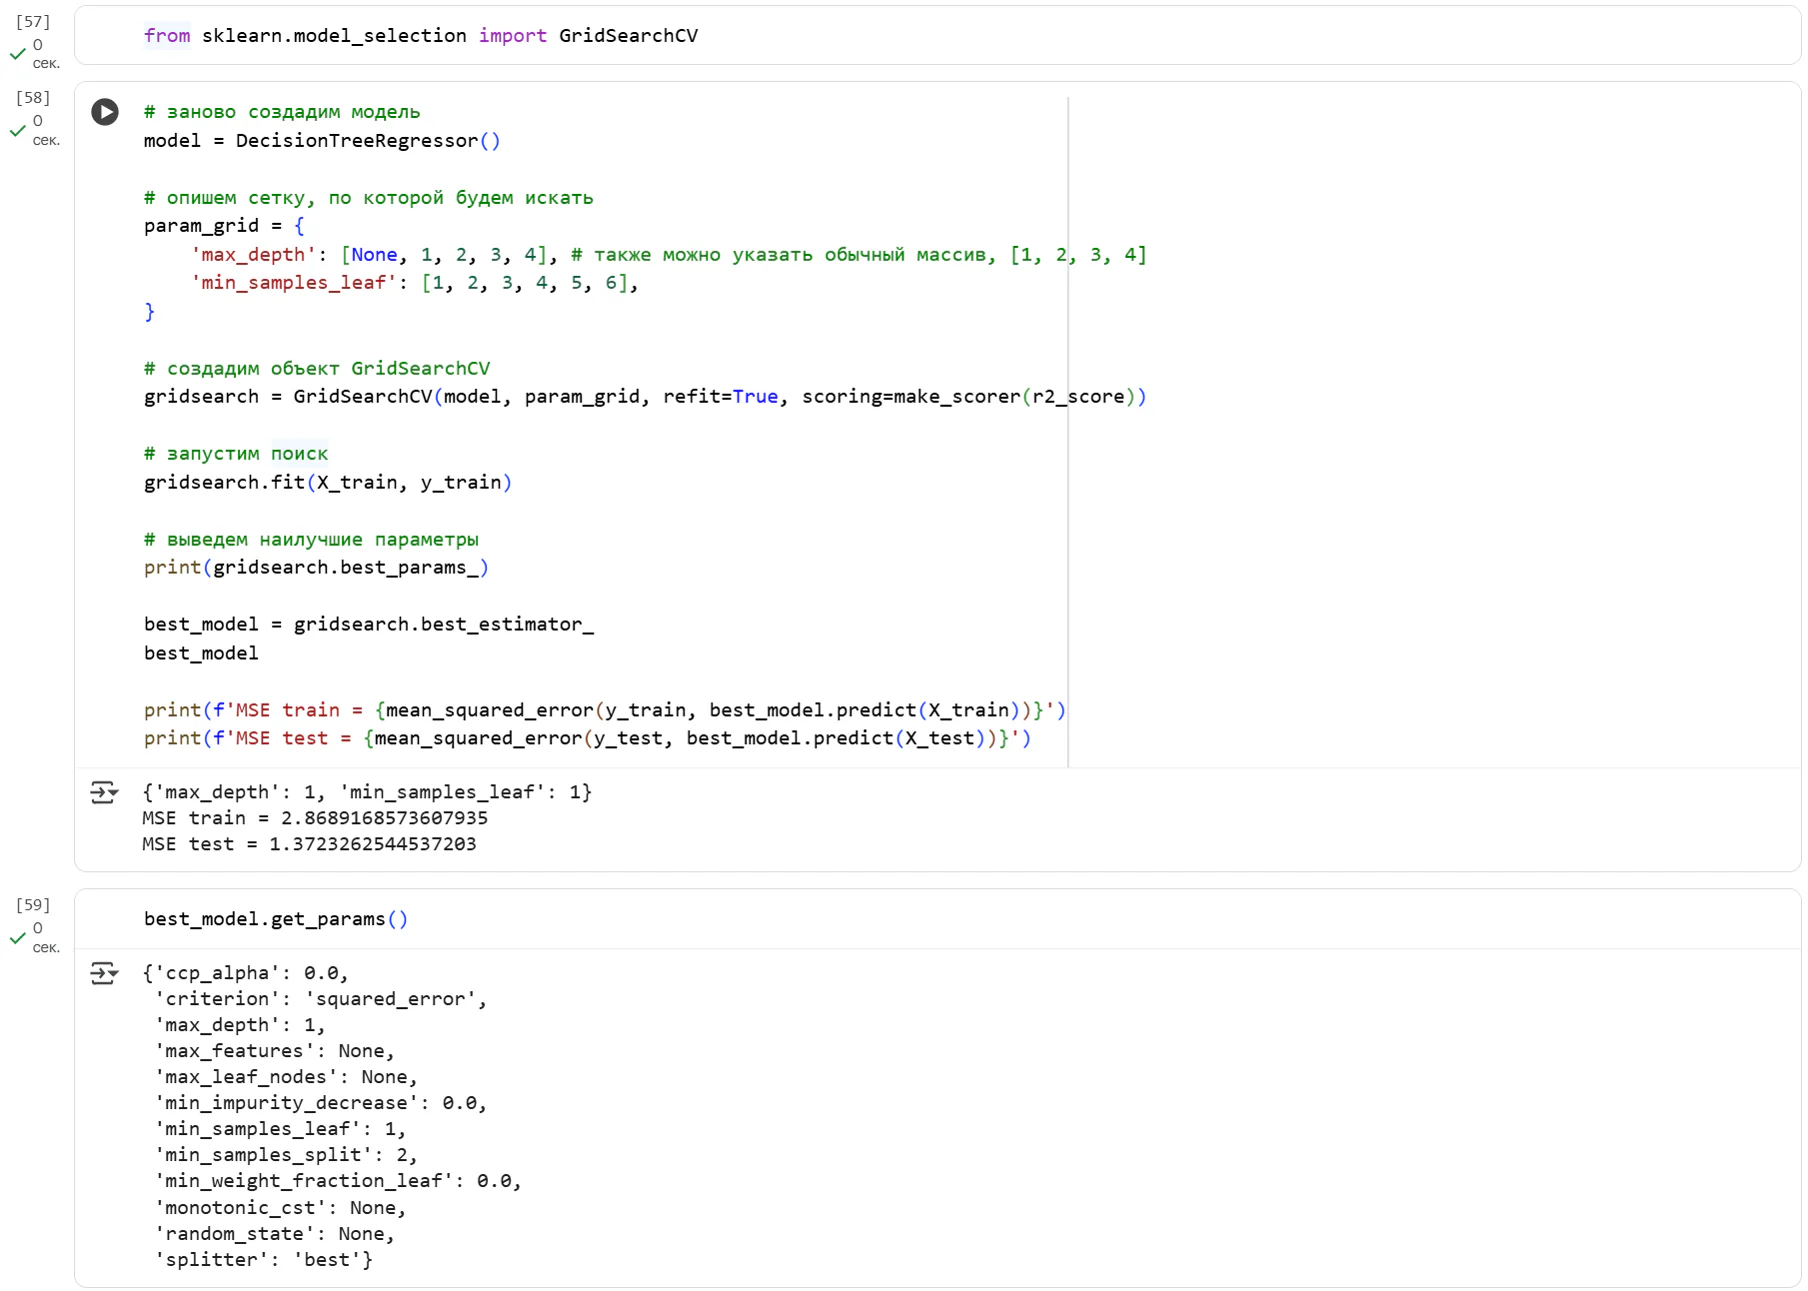

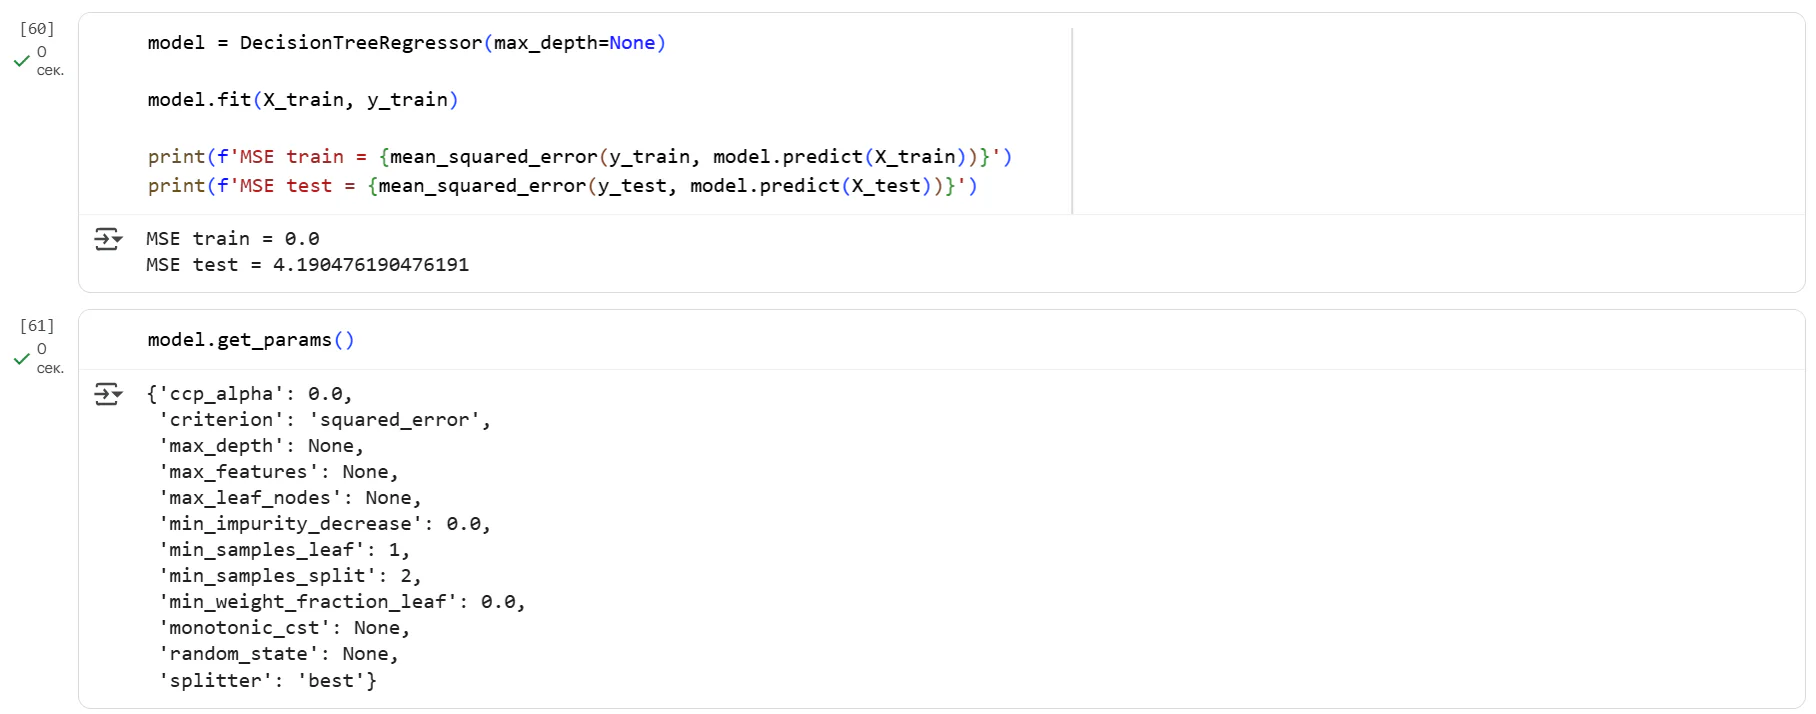



после вашего вопроса тоже стало непонятно почему так происходит, поэтому решила разобраться вместе с нейронкой

с одной стороны это действительно так: переобучение видно только в сравнении с тестовой выборкой, хотя по сути модель опирается только на тренировочную. но по сути GridSearchCV использует кросс-валидацию

берется первая комбинация гиперпараметров -> идет разбиение на фолды (5 по умолчанию) и получается 5 разных моделек, метрики по которым усредняются

так мы проходимся по всем возможным комбинациям гиперпараметров и лучшем выбирается набор с лучшим средним значением метрики на тестовых фолдах кросс-валидации. теперь это становится логичнее, ведь при max_depth = None у нас успешность в глобальном случае, когда весь X_train – тренировочный, но при кросс-валидации он походу проваливается

1. как раз из-за разделения X_train на фолды получается что max_depth=None проигрывает из-за усреднения метрики. а при обычном обучении с дефолтными параметрами кросс-валидация не применяется
2. в итоге подбор идет не по ошибке на всей тренировочной выборке по усредненной ошибке для фолдов при кросс-валидации


## 5. Сохранение модели

In [ ]:
# save the model to disk
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

## Заключение


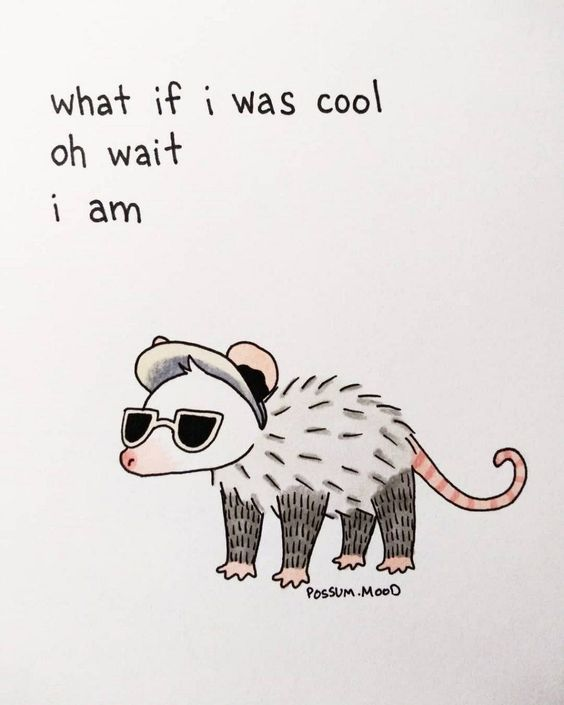

Ура! Мы дошли до самого самого конца семинара! Я считаю, что мы молодцы, за остальных сказать не могу (читать только с голосом Тинькова).

Итак, что мы тут поделывали на этом семинаре? Давайте резюмируем. Мы:
* глубже познакомились с функционалом библиотеки sklearn;
* научились обучать модели для задачи регрессии;
* научились делать предсказания и оценивать предсказания модели;
* гаучились сохранять модель.



Теперь вы можете брать любой другой датасет и обучать модельки на задачах регрессии!

Все ссылочки в одном месте!
* Более подробный обзор метрик для задач регрессии и классификации можно найти в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).
* Какие метрики есть в sklearn, можно посмотреть [здесь](https://scikit-learn.org/stable/modules/model_evaluation.html).
* Узнать подробнее о том, что под капотом у класса `DecisionTree()`, можно в лекции $→$ [тык](https://www.youtube.com/live/h5vF3mUxNUw).
* Более подробный разбор различных методов кросс-валидации можно почитать в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/kross-validaciya).